<h1 style='text-align: center; color: lightblue; font-size: 40px'> Neural Nets from scratch </h1>
<h2 style='text-align: center; color: lightblue; font-size: 30px'> Linear regression </h2>

In [1]:
%load_ext pycodestyle_magic
%flake8_on

In [2]:
import pandas as pd
import numpy as np
import torch
import math
from functools import partial
import matplotlib.pyplot as plt

# who knows how to perform linear regression using gradient descent ?
Figure together the pseudo code

#Pseudo code:
#g
#i
#t
    #m
    #c
    #b
    #u

#### Pseudo code answer:

* get the data
* initialize weights
* train: for each epoch:
* * make predictions
* * compute the loss
* * backpropagate the loss
* * update the gradients

# who can code it ? 
Create data that follow the function y=3x+2. Then figure a way to find back these parameters using gradient descent.

## Help: math equations for gradient calculation

\begin{array}{c}
{M S E=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}} \\
{M S E=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-(a x_{i} + b ) \right)^{2}} \\
{M S E=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-a x_{i} - b\right)^{2}}
\end{array}




\begin{aligned}
\frac{\partial M S E}{\partial a} &=\frac{\partial M S E}{\partial \hat{y}_{i}} \cdot \frac{\partial \hat{y}_{i}}{\partial a}=\frac{1}{N} \sum_{i=1}^{N} 2\left(y_{i}-a x_{i} - b\right) \cdot(-1)=-2 \frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)* \\
\frac{\partial M S E}{\partial b} &=\frac{\partial M S E}{\partial \hat{y}_{i}} \cdot \frac{\partial \hat{y}_{i}}{\partial b}=\frac{1}{N} \sum_{i=1}^{N} 2\left(y_{i}-a x_{i} - b\right) \cdot\left(-x_{i}\right)=-2 \frac{1}{N} \sum_{i=1}^{N} x_{i}\left(y_{i}-\hat{y}_{i}\right) **
\end{aligned}
*the mean of errors

\**the mean of (errors * xi)

## Numpy solution

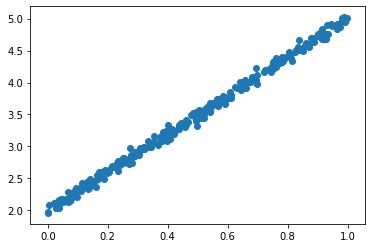

In [125]:
import numpy as np
import matplotlib.pyplot as plt
# get data
x = np.random.rand(300)
y = 3 * x + 2 + (np.random.randn(300) * 0.05)

plt.scatter(x, y)

In [126]:
# initialize parameters (at first, we believe a=1 and b=1)
a = 1.
b = 1.

# train:
for epoch in range(2000):
    # make predictions
    y_hat = a * x + b

    # compute the loss
    errors = (y - y_hat)
    loss = (errors ** 2).mean()

    # print the loss to ensure training is going well:
    if epoch % 100 == 0:
        print(loss)

    # backpropagate the loss
    a_grad = -2 * errors.mean()
    b_grad = -2 * (x * errors).mean()

    # update parameters
    a -= a_grad * 0.001  # Try with and without the learning rate ;)
    b = b - b_grad * 0.001

4.199929772863866
2.7653641615528444
1.821252403633049
1.1999218609717446
0.7910227212431653
0.5219308508234801
0.34485039042863225
0.22832562986546084
0.15165474678664945
0.10121333942361752
0.06803484559462827
0.04621815204208705
0.03187959975419687
0.022463270781886393
0.016287069649549533
0.012243987467947743
0.009605495916733039
0.007892155614718753
0.006788460069516291
0.006086792240848908


In [127]:
print(a, b)

2.8156966954933846 2.071977567574653


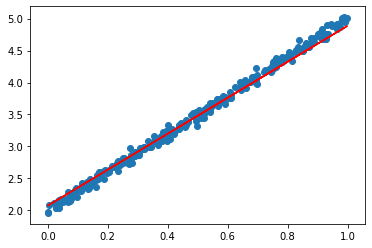

In [128]:
y_pred = a * x + b
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")

# Why pytorch ?

Pytorch looks a lot like numpy. And it has a lot of advantages. Let's see:

## Linear regression with pytorch

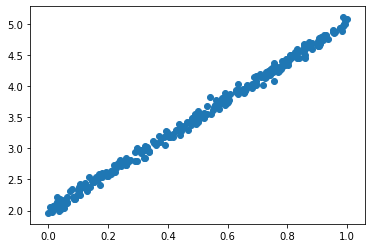

In [129]:
import torch
import matplotlib.pyplot as plt

# see how close torch is to numpy ?
x = torch.rand(300)
y = 3 * x + 2 + (torch.randn(300) * 0.05)
plt.scatter(x, y)
plt.show()

In [130]:
a = torch.nn.Parameter(torch.tensor(1.))
b = torch.nn.Parameter(torch.tensor(1.))

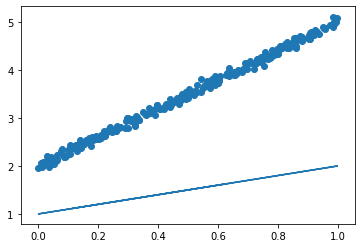

In [131]:
y_pred = (a * x + b).detach().numpy()
plt.scatter(x, y)
plt.plot(x, y_pred)

In [143]:
epochs = 10000
a = torch.nn.Parameter(torch.tensor(1.))
b = torch.nn.Parameter(torch.tensor(1.))

for i in range(epochs):
    # calculate the preds
    y_pred = a * x + b

    # calculate the loss
    mse = ((y - y_pred) ** 2).mean()
    if i % 1000 == 0:
        print(mse)

    # backward pass:
    mse.backward()

    # gradient descent:
    with torch.no_grad():
        a -= a.grad * 0.001
        b -= b.grad * 0.001
        a.grad.zero_()
        b.grad.zero_()

tensor(4.3815, grad_fn=<MeanBackward0>)
tensor(0.1179, grad_fn=<MeanBackward0>)
tensor(0.0703, grad_fn=<MeanBackward0>)
tensor(0.0539, grad_fn=<MeanBackward0>)
tensor(0.0416, grad_fn=<MeanBackward0>)
tensor(0.0322, grad_fn=<MeanBackward0>)
tensor(0.0252, grad_fn=<MeanBackward0>)
tensor(0.0198, grad_fn=<MeanBackward0>)
tensor(0.0158, grad_fn=<MeanBackward0>)
tensor(0.0127, grad_fn=<MeanBackward0>)


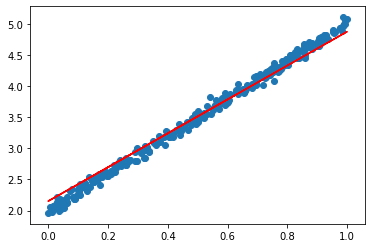

In [144]:
y_pred = (a * x + b).detach().numpy()
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")

In [145]:
print(a, b)

Parameter containing:
tensor(2.7264, requires_grad=True) Parameter containing:
tensor(2.1500, requires_grad=True)


### Learn more
You'll find another approach that uses more advanced pytorch functionalities <a href="https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-sgd.ipynb"> here</a>, but it requires having the fastai library installed


In [148]:
# An interesting thing they do differently
# is they store a and b in a single vector
# And then perform matrix-vector multiplication

In [150]:
x = torch.ones(200, 2)
a = torch.nn.Parameter(torch.tensor([1., 1.]))

In [151]:
a @ x

RuntimeError: size mismatch, m1: [1 x 2], m2: [200 x 2] at /opt/conda/conda-bld/pytorch_1570910687650/work/aten/src/TH/generic/THTensorMath.cpp:197

In [152]:
x @ a

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2.], grad_fn=<MvBackward>)

To get a visual understanding of matrix-vector (or matrix-matrix) multiplications, <a href="http://matrixmultiplication.xyz/"> visit this link </a>

You can find a pytorch tutorial that dives deeply into the autograd and computation graph here <a href="https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e"> here </a>